# Get Stared

In [10]:
import os
from langgraph.prebuilt import create_react_agent
from dotenv import load_dotenv
from langchain_community.chat_models.tongyi import ChatTongyi
from langchain.chat_models import init_chat_model

load_dotenv()


True

In [ ]:
def get_weather(city: str) -> str:
    # Simulate a weather API call
    """ 返回指定城市的天气信息
    args:
        city(str): 城市名称
    return:
        str: 城市的天气信息
    description:
        该函数通过模拟API调用返回指定城市的天气信息。
    """
    return f"The weather in {city} is sunny."

model = ChatTongyi(
    model="qwen-plus",
    temperature=0
)

agent = create_react_agent(
    model=model,
    tools=[get_weather],
    prompt="You are a helpful assistant that can provide weather information."
)

agent.invoke(
    {
        "messages": [{"role": "user", "content": "What is the wather in sf?"}]
    }
)

{'messages': [HumanMessage(content='What is the wather in sf?', additional_kwargs={}, response_metadata={}, id='32ef4ec7-1652-44b7-b6d8-895dfb110ec0'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_cda7ad59184b4c69a57d2f', 'type': 'function', 'function': {'name': 'get_weather', 'arguments': '{"city": "sf"}'}}]}, response_metadata={'model_name': 'qwen-plus', 'finish_reason': 'tool_calls', 'request_id': 'be77575e-5819-9124-8d3b-e2f54ccd1240', 'token_usage': {'input_tokens': 215, 'output_tokens': 19, 'total_tokens': 234, 'prompt_tokens_details': {'cached_tokens': 0}}}, id='run--8a7dd04a-1b12-41a8-8e8f-b33d302ccbcb-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'sf'}, 'id': 'call_cda7ad59184b4c69a57d2f', 'type': 'tool_call'}]),
  ToolMessage(content='The weather in sf is sunny.', name='get_weather', id='8584d06d-a6b6-4e93-bd7e-e093dbf007aa', tool_call_id='call_cda7ad59184b4c69a57d2f'),
  AIMessage(content='The weather in San Francisco (SF) is 

## Add Memory

In [17]:
from langgraph.checkpoint.memory import InMemorySaver

checkpointer = InMemorySaver()

agent = create_react_agent(
    model=model,
    tools=[get_weather],
    checkpointer=checkpointer
)

config = {
    "configurable": {"thread_id": "1"}
}

sf_response = agent.invoke(
    {
        "messages": [{"role": "user", "content": "What is the weather in sf?"}]
    },config
)

ny_response = agent.invoke(
    {"messages": [{"role": "user", "content": "What about new york?"}]}, config
)

In [18]:
sf_response

{'messages': [HumanMessage(content='What is the weather in sf?', additional_kwargs={}, response_metadata={}, id='75b63fae-bbfa-4e5f-b01c-f388b8dd2cb7'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_c209c2b52be6472d949629', 'type': 'function', 'function': {'name': 'get_weather', 'arguments': '{"city": "sf"}'}}]}, response_metadata={'model_name': 'qwen-plus', 'finish_reason': 'tool_calls', 'request_id': '27e18d5c-22b2-92c0-9fc8-aa8c9d710297', 'token_usage': {'input_tokens': 203, 'output_tokens': 19, 'total_tokens': 222, 'prompt_tokens_details': {'cached_tokens': 0}}}, id='run--845d75d4-e4dc-4315-8fdd-089c80b4f139-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'sf'}, 'id': 'call_c209c2b52be6472d949629', 'type': 'tool_call'}]),
  ToolMessage(content='The weather in sf is sunny.', name='get_weather', id='4ddb2f2e-f86e-4d96-84dc-ce84dcebfea8', tool_call_id='call_c209c2b52be6472d949629'),
  AIMessage(content='The weather in San Francisco is sunn

In [19]:
ny_response

{'messages': [HumanMessage(content='What is the weather in sf?', additional_kwargs={}, response_metadata={}, id='75b63fae-bbfa-4e5f-b01c-f388b8dd2cb7'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_c209c2b52be6472d949629', 'type': 'function', 'function': {'name': 'get_weather', 'arguments': '{"city": "sf"}'}}]}, response_metadata={'model_name': 'qwen-plus', 'finish_reason': 'tool_calls', 'request_id': '27e18d5c-22b2-92c0-9fc8-aa8c9d710297', 'token_usage': {'input_tokens': 203, 'output_tokens': 19, 'total_tokens': 222, 'prompt_tokens_details': {'cached_tokens': 0}}}, id='run--845d75d4-e4dc-4315-8fdd-089c80b4f139-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'sf'}, 'id': 'call_c209c2b52be6472d949629', 'type': 'tool_call'}]),
  ToolMessage(content='The weather in sf is sunny.', name='get_weather', id='4ddb2f2e-f86e-4d96-84dc-ce84dcebfea8', tool_call_id='call_c209c2b52be6472d949629'),
  AIMessage(content='The weather in San Francisco is sunn

## 自定义结构化输出

In [20]:
from pydantic import BaseModel

In [22]:
class WeatherResponse(BaseModel):
    conditions: str
    
agent = create_react_agent(
    model=model,
    tools=[get_weather],
    response_format=WeatherResponse
)

response = agent.invoke(
    {"messages": [{"role": "user", "content": "What is the weather in sf?"}]}
)

response["structured_response"]

In [ ]:
~response

{'messages': [HumanMessage(content='What is the weather in sf?', additional_kwargs={}, response_metadata={}, id='4ae4740d-6a40-4cd5-a1b1-e99c957a0ba2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_ba42d87240c84ffeae9cee', 'type': 'function', 'function': {'name': 'get_weather', 'arguments': '{"city": "sf"}'}}]}, response_metadata={'model_name': 'qwen-plus', 'finish_reason': 'tool_calls', 'request_id': '0d9af230-35d0-9f08-9b08-b81c546f42d5', 'token_usage': {'input_tokens': 203, 'output_tokens': 19, 'total_tokens': 222, 'prompt_tokens_details': {'cached_tokens': 0}}}, id='run--4164c91a-7839-4875-9486-2eb09033aab4-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'sf'}, 'id': 'call_ba42d87240c84ffeae9cee', 'type': 'tool_call'}]),
  ToolMessage(content='The weather in sf is sunny.', name='get_weather', id='ccd6a69e-af08-4086-b41d-8682dd1d7255', tool_call_id='call_ba42d87240c84ffeae9cee'),
  AIMessage(content='The weather in San Francisco is sunn

## 添加人机交互

In [1]:
import os
from dotenv import load_dotenv
from langchain_community.chat_models.tongyi import ChatTongyi

load_dotenv()

llm = ChatTongyi(
    model="qwen-plus",
    temperature=0.7
)

In [ ]:
from typing import Annotated
from langchain_tavily import TavilySearch
from langchain.tools import tool
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

from langgraph.types import Command, interrupt

class State(TypedDict):
    messages: Annotated[list, add_messages]
    name: str
    birthday: str
    
graph_builder = StateGraph(State)

@tool
def human_assistance(query: str) -> str:
    """Provide assistance to the user based on the query.

    Args:
        query (str): The user's query.

    Returns:
        str: The assistant's response.
    """
    # Implement the logic to provide assistance

    human_response = interrupt({"query": query})
    return human_response['data']


tool = TavilySearch(max_results=2)
tools = [tool, human_assistance]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    message = llm_with_tools.invoke(
        state['messages']
    )
    
    assert len(message.tool_calls) <= 1
    return {
        "messages": [message]
    }
    
graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(
    tools=tools
)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")


In [ ]:
ateGraph(State)

@tool
def human_assistance(query: str) -> str:
    """Provide assistance to the user based on the query.

    Args:
        query (str): The user's query.

    Returns:
        str: The assistant's response.
    """
    # Implement the logic to provide assistance

    human_response = interrupt({"query": query})
    return human_response['data']


tool = TavilySearch(max_results=2)
tools = [tool, human_assistance]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    message = llm_with_tools.invoke(
        state['messages']
    )
    
    assert len(message.tool_calls) <= 1
    return {
        "messages": [message]
    }
    
graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(
    tools=tools
)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")


绑定图

In [3]:
from langgraph.checkpoint.memory import InMemorySaver
memory = InMemorySaver()

graph = graph_builder.compile(checkpointer=memory)

可视化图

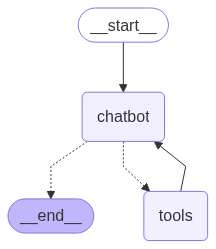

In [4]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [5]:
user_input = "I need some expert guidance for building an AI agent. Could you request assistance for me?"
config = {"configurable": {"thread_id": "1"}}

events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I need some expert guidance for building an AI agent. Could you request assistance for me?
================================== Ai Message ==================================
Tool Calls:
  human_assistance (call_9933f13209ab4d5495f62a)
 Call ID: call_9933f13209ab4d5495f62a
  Args:
    query: I need some expert guidance for building an AI agent. Could you request assistance for me?


In [6]:
snapshot = graph.get_state(config)
snapshot.next

('tools',)

恢复执行

In [9]:
human_response = (
    "We, the experts are here to help! We'd recommend you check out LangGraph to build your agent."
    "It's much more reliable and extensible than simple autonomous agents."
)

human_command = Command(resume={"data": human_response})

events = graph.stream(human_command, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()


================================== Ai Message ==================================

We're here to help you every step of the way!

For building an AI agent, we recommend checking out LangGraph. It's a powerful framework that offers greater reliability and extensibility compared to simple autonomous agents. Would you like us to provide more specific guidance about using LangGraph for your particular use case?


## 自定义状态

In [12]:
import os
from dotenv import load_dotenv
load_dotenv()

from typing import Annotated
from langchain_tavily import TavilySearch
from langchain_core.messages import ToolCall
from langchain_core.messages import ToolMessage
from langchain_core.tools import tool, InjectedToolCallId
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.types import Command, interrupt

In [13]:
class State(TypedDict):
    message: Annotated[list, add_messages]
    name: str
    birthday: str
    
@tool
def human_message(name: str, birthday: str, tool_call_id: Annotated[str, InjectedToolCallId]) -> str:
    """Request assisatance from a human"""
    human_response = interrupt({
        "question": "Is this correct?",
        "name": name,
        "birthday": birthday
    })
    
    if human_response.get("correct", ".").lower().startswith('y'):
        verified_name = name
        verified_birthday = birthday
        response = "Correct"
    else:
        verified_name = human_response.get("name")
        verified_birthday = human_response.get("birthday")
        response = "Correct"
    
    state_update = {
        "name": verified_name,
        "birthday": verified_birthday,
        "messages": [ToolMessage(response, tool_call_id=tool_call_id)]
    }
    
    return Command(update=state_update)


In [14]:
tool = TavilySearch(max_results=2)
tools = [tool, human_assistance]
llm_with_tools = llm.bind_tools(tools)

In [16]:
def chatbot(state: State):
    message = llm_with_tools.invoke(
        state['messages']
    )
    return {"messages": [message]}

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot", tools_condition
)

graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")
memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

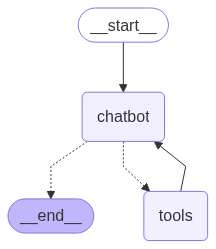

In [17]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass